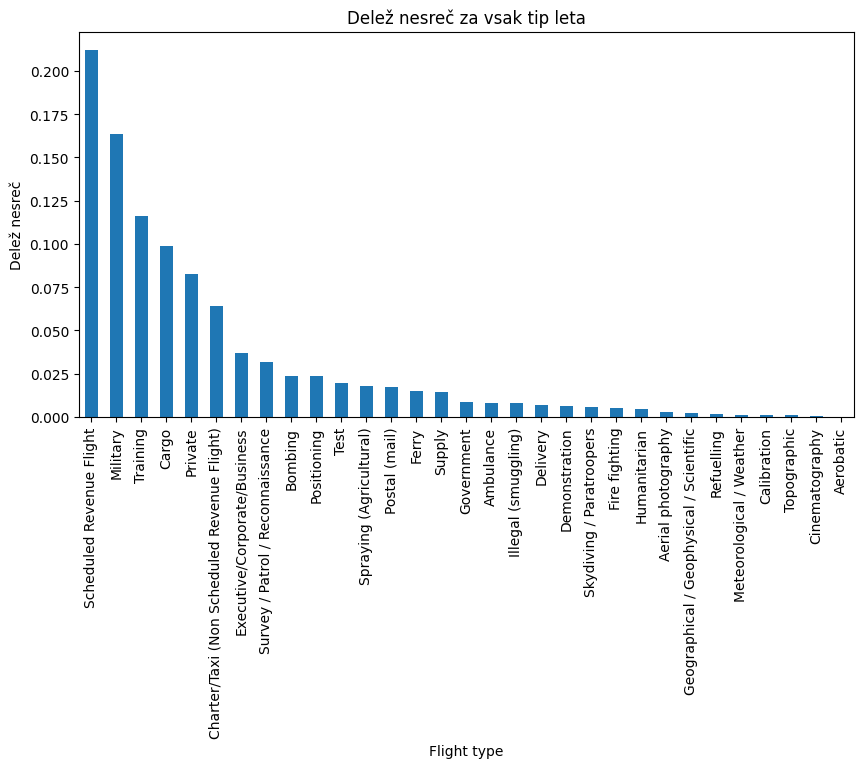

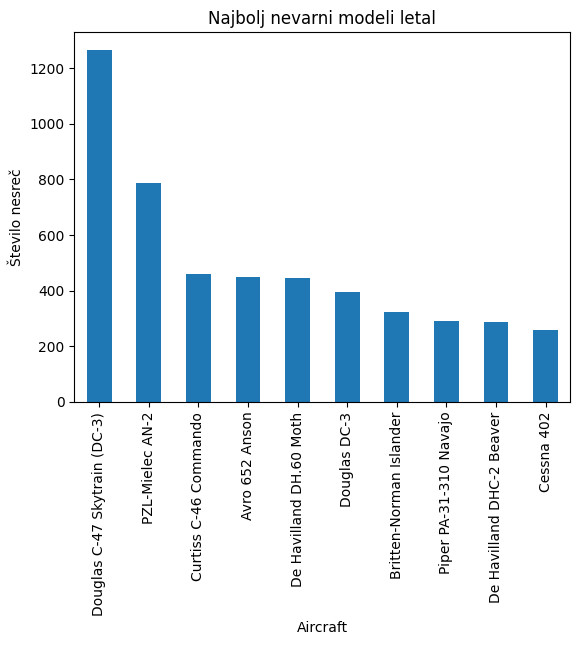

In [41]:
# -*- coding: utf-8 -*-
from scipy.stats import beta
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Kateri tipi letov so najbolj nevarni?
crashes_df = pd.read_csv("C:/Users/Tomaz/Downloads/crashes/Plane Crashes.csv")

# Najprej izračunamo število nesreč za vsak tip leta
crash_types = crashes_df["Flight type"].value_counts()

# Izračunamo število vseh nesreč
total_crashes = crash_types.sum()

# Izračunamo delež nesreč za vsak tip letala
crash_types = crash_types / total_crashes

# Izrišemo delež nesreč za vsak tip letala
plt.figure(figsize=(10, 5))
ax = crash_types.plot(kind='bar')

# Dodaj odstotke na graf
def dodaj_odstotke():
    for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height() * 100), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
                    textcoords='offset points', rotation=45)

plt.title("Delež nesreč za vsak tip leta")
plt.ylabel("Delež nesreč")
plt.show()

# glede na ugotovitve lahko razberemo, da je najbolj nevaren tip leta "Scheduled revenue flight" oz. komercialni potniški let.

# želimo prikazati še najbolj nevarne modele letal (Aircrart), ki niso "military" tipa
crashes_df = crashes_df[crashes_df["Flight type"] != "Military"]
crashes_df["Aircraft"].value_counts().head(10).plot(kind='bar')
plt.title("Najbolj nevarni modeli letal")
plt.ylabel("Število nesreč")
plt.show()







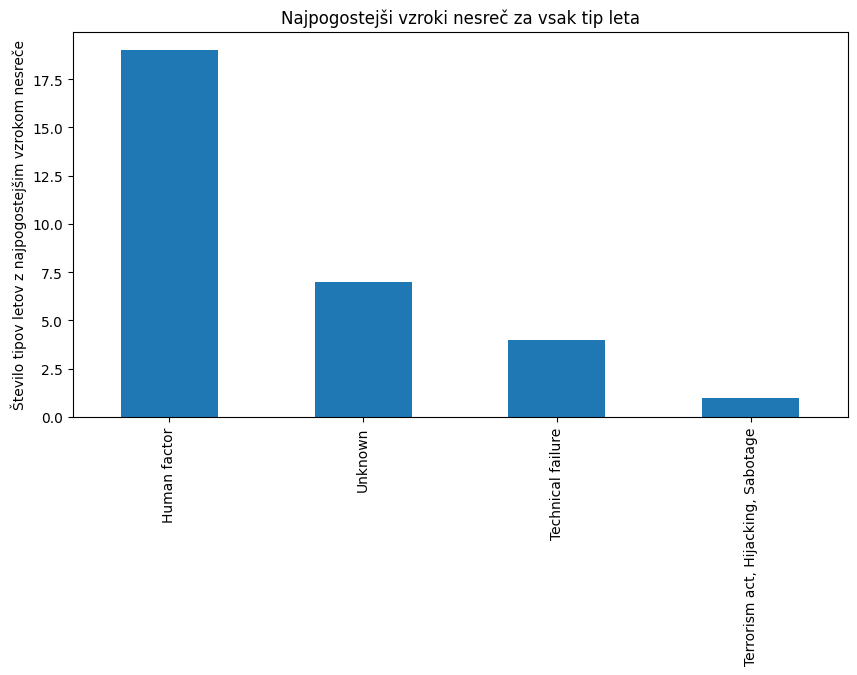

<Figure size 1000x2200 with 0 Axes>

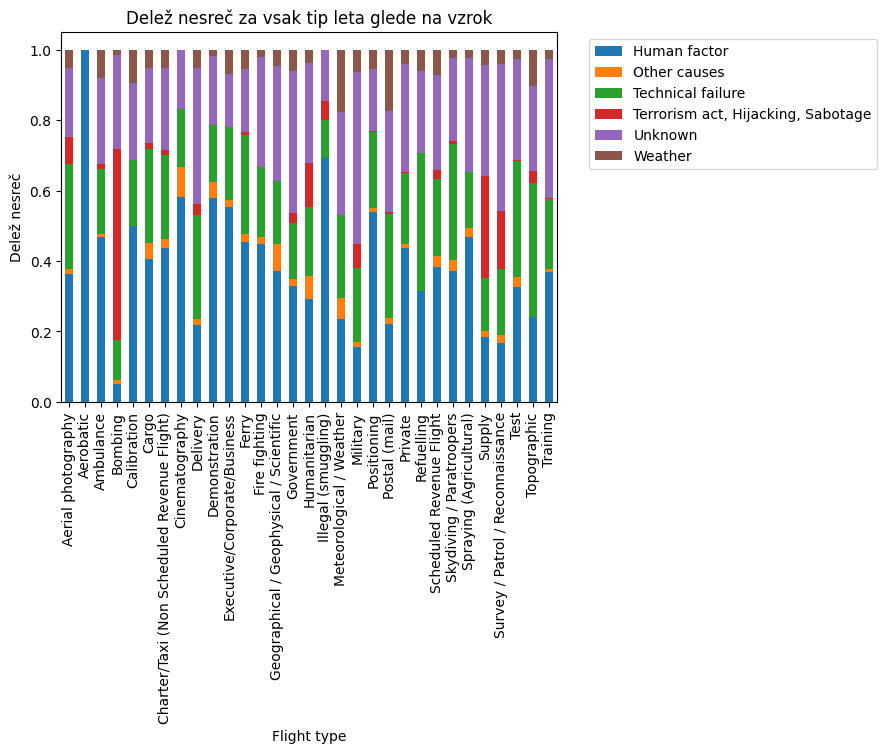

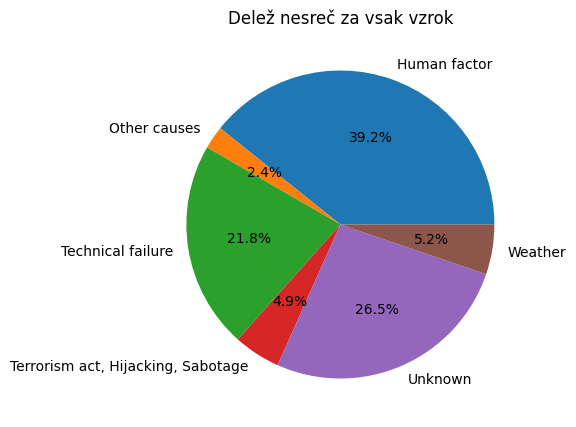

Crash cause                         Crash cause                         Aircraft                    
Human factor                        Human factor                        Douglas C-47 Skytrain (DC-3)    514
                                                                        PZL-Mielec AN-2                 366
                                                                        Avro 652 Anson                  175
Other causes                        Other causes                        PZL-Mielec AN-2                  43
                                                                        Douglas C-47 Skytrain (DC-3)     35
                                                                        Curtiss C-46 Commando            14
Technical failure                   Technical failure                   Douglas C-47 Skytrain (DC-3)    448
                                                                        Curtiss C-46 Commando           203
                                   

In [40]:
# Izberemo samo vrstice, ki imajo podan vzrok nesreče
crashes_df = crashes_df[crashes_df["Crash cause"].notnull()]

# Izračunamo število nesreč za vsak tip letala in vzrok nesreče
crash_causes = crashes_df.groupby(["Flight type", "Crash cause"]).size()    

# Za vsak tip letala poiščemo najpogostejši vzrok nesreče
most_common_causes = crash_causes.groupby(level=0).idxmax().apply(lambda x: x[1])

# Izrišemo najpogostejše vzroke nesreč za vsak tip letala
plt.figure(figsize=(10, 5))
most_common_causes.value_counts().plot(kind='bar')
plt.title("Najpogostejši vzroki nesreč za vsak tip leta")
plt.ylabel("Število tipov letov z najpogostejšim vzrokom nesreče")
plt.show()


#izrišemo še diagram, ki prikazuje delež nesreč za vsak tip leta glede na vzrok
plt.figure(figsize=(10, 22))
crash_causes = crash_causes.unstack()
crash_causes = crash_causes.fillna(0)
crash_causes = crash_causes.div(crash_causes.sum(axis=1), axis=0)
crash_causes.plot(kind='bar', stacked=True)
plt.title("Delež nesreč za vsak tip leta glede na vzrok")
plt.ylabel("Delež nesreč")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# narišemo še tortni diagram in zaišemo delež nesreč za vsak vzrok v odstotkih
plt.figure(figsize=(10, 5))
crash_causes = crash_causes.fillna(0)
crash_causes = crash_causes.sum()
crash_causes.plot(kind='pie', autopct='%1.1f%%')
plt.title("Delež nesreč za vsak vzrok")
plt.show()

# za vsak vzrok nesreče želimo izpisati še 3 modele ("Aircraft") letala, ki so h posameznem vzroku nesreče najbolj pogosto udeležena
crashes_df = crashes_df[crashes_df["Aircraft"].notnull()]
crash_causes = crashes_df.groupby(["Crash cause", "Aircraft"]).size()
most_common_aircraft = crash_causes.groupby(level=0).nlargest(3)
print(most_common_aircraft)

#glede na ugotovitve lahko razberemo, da je najpogostejši vzrok nesreče "Human factor" oz. napaka pilota.